In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [2]:
main_data = pd.read_csv('data/prepared_data.csv')

In [3]:
main_data = main_data.drop(columns=['Unnamed: 0'], axis=1)

In [4]:
main_data.describe()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,521565.000000,521565.000000,521565.000000,521565.000000,521565.000000,521565.000000,521565.000000,521565.000000,521565.000000,521565.000000,521565.000000
mean,73.000000,82.313595,2030.017793,342.247748,364.508958,0.071036,0.095587,229.228351,601.531554,56.621907,4.023186
std,41.856939,45.873564,547.374132,154.093264,161.800386,0.256886,0.294025,380.390839,66.142150,17.740476,1.106864
min,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.000000,0.000000,456.000000,23.000000,0.900000
25%,37.000000,43.000000,1558.000000,240.620000,249.320000,0.000000,0.000000,28.000000,553.000000,34.000000,3.500000
50%,73.000000,76.000000,1993.000000,308.490000,319.130000,0.000000,0.000000,108.000000,596.000000,56.000000,4.000000
75%,109.000000,110.000000,2539.000000,447.230000,478.326000,0.000000,0.000000,284.000000,651.000000,77.000000,4.500000
max,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.000000,24299.000000,713.000000,93.000000,7.000000


In [5]:
main_data['checkout_price'] = np.log1p(main_data['checkout_price'])
main_data['base_price'] = np.log1p(main_data['base_price'])
main_data['num_orders'] = np.log1p(main_data['num_orders'])

In [6]:
main_data['perc_diff']=((main_data['checkout_price']-main_data['base_price'])/(main_data['base_price'])*100)

In [7]:
main_data.dtypes

week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders               float64
category                  object
cuisine                   object
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
perc_diff                float64
dtype: object

In [8]:
def calculate_and_merge_avg(df, group_by_cols, agg_col):
    avg_df = (
        main_data.groupby(group_by_cols)[agg_col].mean()
        .reset_index()
        .rename(columns={agg_col: 'Average_price_per_{}'.format(group_by_cols[1])})
    )
    return df.merge(avg_df, how='outer', on=group_by_cols)

agg_col = 'checkout_price'

group_by_cols = ['week', 'city_code']
merge1 = calculate_and_merge_avg(main_data, group_by_cols, agg_col)

group_by_cols = ['week', 'center_id']
merge2 = calculate_and_merge_avg(merge1, group_by_cols, agg_col)

group_by_cols = ['week', 'category']
merge3 = calculate_and_merge_avg(merge2, group_by_cols, agg_col)

group_by_cols = ['week', 'cuisine']
merge4 = calculate_and_merge_avg(merge3, group_by_cols, agg_col)

group_by_cols = ['week', 'meal_id']
merge5 = calculate_and_merge_avg(merge4, group_by_cols, agg_col)

group_by_cols = ['week', 'region_code']
merge6 = calculate_and_merge_avg(merge5, group_by_cols, agg_col)

group_by_cols = ['week', 'center_type']
merge7 = calculate_and_merge_avg(merge6, group_by_cols, agg_col)

group_by_cols = ['week', 'op_area']
merge8 = calculate_and_merge_avg(merge7, group_by_cols, agg_col)


In [9]:
merge8.head()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,...,op_area,perc_diff,Average_price_per_city_code,Average_price_per_center_id,Average_price_per_category,Average_price_per_cuisine,Average_price_per_meal_id,Average_price_per_region_code,Average_price_per_center_type,Average_price_per_op_area
0,1,91,1062,5.227519,5.216728,0,0,3.761200,Beverages,Italian,...,0.9,0.206867,5.720206,5.647096,5.325136,5.601794,5.176376,5.725027,5.728377,5.647096
1,1,91,1109,5.639742,5.744380,1,0,5.375278,Rice Bowl,Indian,...,0.9,-1.821586,5.720206,5.647096,5.767132,5.863481,5.580744,5.725027,5.728377,5.647096
2,1,91,1198,5.338280,5.607357,0,0,0.000000,Extras,Thai,...,0.9,-4.798646,5.720206,5.647096,5.135605,5.302142,5.191187,5.725027,5.728377,5.647096
3,1,91,1207,5.783764,5.968708,0,0,5.323010,Beverages,Continental,...,0.9,-3.098559,5.720206,5.647096,5.325136,6.227488,5.776725,5.725027,5.728377,5.647096
4,1,91,1216,5.939844,6.000986,0,0,0.000000,Pasta,Italian,...,0.9,-1.018867,5.720206,5.647096,5.891636,5.601794,6.021329,5.725027,5.728377,5.647096


In [10]:
merge9 = merge8

merge9['checkout_price/avg_checkout price for per week per city_code']=merge9['checkout_price']/merge9['Average_price_per_city_code']
merge9['checkout_price/avg_checkout price for per week per center_id']=merge9['checkout_price']/merge9['Average_price_per_center_id']
merge9['checkout_price/avg_checkout price for per week per category']=merge9['checkout_price']/merge9['Average_price_per_category']
merge9['checkout_price/avg_checkout price for per week per cuisine']=merge9['checkout_price']/merge9['Average_price_per_cuisine']
merge9['checkout_price/avg_checkout price for per week per meal_id']=merge9['checkout_price']/merge9['Average_price_per_meal_id']
merge9['checkout_price/avg_checkout price for per week per region_code']=merge9['checkout_price']/merge9['Average_price_per_region_code']
merge9['checkout_price/avg_checkout price for per week per center_type']=merge9['checkout_price']/merge9['Average_price_per_center_type']
merge9['checkout_price/avg_checkout price for per week per op_area']=merge9['checkout_price']/merge9['Average_price_per_op_area']

cols_to_remove = ['Average_price_per_city_code', 'Average_price_per_center_id', 'Average_price_per_category', 'Average_price_per_cuisine', 'Average_price_per_meal_id', 'Average_price_per_region_code', 'Average_price_per_center_type', 'Average_price_per_op_area']
merge9.drop(columns = cols_to_remove, inplace = True)
merge9.head()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,...,op_area,perc_diff,checkout_price/avg_checkout price for per week per city_code,checkout_price/avg_checkout price for per week per center_id,checkout_price/avg_checkout price for per week per category,checkout_price/avg_checkout price for per week per cuisine,checkout_price/avg_checkout price for per week per meal_id,checkout_price/avg_checkout price for per week per region_code,checkout_price/avg_checkout price for per week per center_type,checkout_price/avg_checkout price for per week per op_area
0,1,91,1062,5.227519,5.216728,0,0,3.761200,Beverages,Italian,...,0.9,0.206867,0.913869,0.925700,0.981669,0.933187,1.009880,0.913100,0.912566,0.925700
1,1,91,1109,5.639742,5.744380,1,0,5.375278,Rice Bowl,Indian,...,0.9,-1.821586,0.985933,0.998698,0.977911,0.961842,1.010572,0.985103,0.984527,0.998698
2,1,91,1198,5.338280,5.607357,0,0,0.000000,Extras,Thai,...,0.9,-4.798646,0.933232,0.945314,1.039465,1.006816,1.028335,0.932446,0.931901,0.945314
3,1,91,1207,5.783764,5.968708,0,0,5.323010,Beverages,Continental,...,0.9,-3.098559,1.011111,1.024201,1.086125,0.928747,1.001218,1.010260,1.009669,1.024201
4,1,91,1216,5.939844,6.000986,0,0,0.000000,Pasta,Italian,...,0.9,-1.018867,1.038397,1.051841,1.008183,1.060347,0.986467,1.037522,1.036916,1.051841


In [11]:
merge9[merge9.columns[14:-3]].corr()

,perc_diff,checkout_price/avg_checkout price for per week per city_code,checkout_price/avg_checkout price for per week per center_id,checkout_price/avg_checkout price for per week per category,checkout_price/avg_checkout price for per week per cuisine,checkout_price/avg_checkout price for per week per meal_id
perc_diff,1.000000,0.258400,0.257810,0.306673,0.363589,0.275266
checkout_price/avg_checkout price for per week per city_code,0.258400,1.000000,0.999602,0.523318,0.733033,0.173139
checkout_price/avg_checkout price for per week per center_id,0.257810,0.999602,1.000000,0.523416,0.732946,0.172824
checkout_price/avg_checkout price for per week per category,0.306673,0.523318,0.523416,1.000000,0.382402,0.322275
checkout_price/avg_checkout price for per week per cuisine,0.363589,0.733033,0.732946,0.382402,1.000000,0.234898
checkout_price/avg_checkout price for per week per meal_id,0.275266,0.173139,0.172824,0.322275,0.234898,1.000000


In [12]:
cols = merge9.columns.tolist()
cols_to_remove = ['checkout_price/avg_checkout price for per week per center_id'] + cols[-3:]
merge9.drop(columns = cols_to_remove, inplace = True)
merge9.head()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,perc_diff,checkout_price/avg_checkout price for per week per city_code,checkout_price/avg_checkout price for per week per category,checkout_price/avg_checkout price for per week per cuisine,checkout_price/avg_checkout price for per week per meal_id
0,1,91,1062,5.227519,5.216728,0,0,3.761200,Beverages,Italian,590,56,TYPE_C,0.9,0.206867,0.913869,0.981669,0.933187,1.009880
1,1,91,1109,5.639742,5.744380,1,0,5.375278,Rice Bowl,Indian,590,56,TYPE_C,0.9,-1.821586,0.985933,0.977911,0.961842,1.010572
2,1,91,1198,5.338280,5.607357,0,0,0.000000,Extras,Thai,590,56,TYPE_C,0.9,-4.798646,0.933232,1.039465,1.006816,1.028335
3,1,91,1207,5.783764,5.968708,0,0,5.323010,Beverages,Continental,590,56,TYPE_C,0.9,-3.098559,1.011111,1.086125,0.928747,1.001218
4,1,91,1216,5.939844,6.000986,0,0,0.000000,Pasta,Italian,590,56,TYPE_C,0.9,-1.018867,1.038397,1.008183,1.060347,0.986467


In [13]:
merge9['city_region'] = merge9['city_code'].astype('str') + '_' + merge9['region_code'].astype('str')
merge9.drop(columns = ['city_code', 'region_code'], inplace = True)
merge9.head()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,center_type,op_area,perc_diff,checkout_price/avg_checkout price for per week per city_code,checkout_price/avg_checkout price for per week per category,checkout_price/avg_checkout price for per week per cuisine,checkout_price/avg_checkout price for per week per meal_id,city_region
0,1,91,1062,5.227519,5.216728,0,0,3.761200,Beverages,Italian,TYPE_C,0.9,0.206867,0.913869,0.981669,0.933187,1.009880,590_56
1,1,91,1109,5.639742,5.744380,1,0,5.375278,Rice Bowl,Indian,TYPE_C,0.9,-1.821586,0.985933,0.977911,0.961842,1.010572,590_56
2,1,91,1198,5.338280,5.607357,0,0,0.000000,Extras,Thai,TYPE_C,0.9,-4.798646,0.933232,1.039465,1.006816,1.028335,590_56
3,1,91,1207,5.783764,5.968708,0,0,5.323010,Beverages,Continental,TYPE_C,0.9,-3.098559,1.011111,1.086125,0.928747,1.001218,590_56
4,1,91,1216,5.939844,6.000986,0,0,0.000000,Pasta,Italian,TYPE_C,0.9,-1.018867,1.038397,1.008183,1.060347,0.986467,590_56


In [14]:
merge9.set_index('week', inplace = True)

expand_min = merge9.groupby([ 'meal_id', 'center_id'])['num_orders'].expanding().min().reset_index()
expand_min.set_index('week', inplace = True)
expand_min.rename(columns = {'num_orders': 'expanding_min'}, inplace = True)

expand_max = merge9.groupby([ 'meal_id', 'center_id'])['num_orders'].expanding().max().reset_index()
expand_max.set_index('week', inplace = True)
expand_max.rename(columns = {'num_orders': 'expanding_max'}, inplace = True)

expand_mean = merge9.groupby([ 'meal_id', 'center_id'])['num_orders'].expanding().mean().reset_index()
expand_mean.set_index('week', inplace = True)
expand_mean.rename(columns = {'num_orders': 'expanding_mean'}, inplace = True)

weights_2 = np.arange(1,3)
wma_2 = merge9.groupby(['meal_id', 'center_id'])['num_orders'].rolling(2).apply(lambda prices: np.dot(prices, weights_2)/weights_2.sum(), raw=True).reset_index()
wma_2.set_index('week', inplace = True)
wma_2.rename(columns = {'num_orders': 'weighted_average_2w'}, inplace = True)

weights_3 = np.arange(1,4)
wma_3 = merge9.groupby(['meal_id', 'center_id'])['num_orders'].rolling(3).apply(lambda prices: np.dot(prices, weights_3)/weights_3.sum(), raw=True).reset_index()
wma_3.set_index('week', inplace = True)
wma_3.rename(columns = {'num_orders': 'weighted_average_3w'}, inplace = True)

expand = pd.concat([expand_min, expand_max, expand_mean, wma_2, wma_3], axis = 1)
expand = expand.loc[:,~expand.columns.duplicated()]
expand.head()

,meal_id,center_id,expanding_min,expanding_max,expanding_mean,weighted_average_2w,weighted_average_3w
week,,,,,,,
1,1062,10,6.763885,6.763885,6.763885,NaN,NaN
2,1062,10,6.663133,6.763885,6.713509,6.696717,NaN
3,1062,10,6.663133,6.763885,6.724868,6.719435,6.722152
4,1062,10,6.663133,7.092574,6.816794,6.977578,6.906004
5,1062,10,6.663133,7.092574,6.826614,6.941452,6.921735


In [15]:
expand[['meal_id', 'center_id', 'expanding_mean', 'weighted_average_2w', 'weighted_average_3w']].head() 

,meal_id,center_id,expanding_mean,weighted_average_2w,weighted_average_3w
week,,,,,
1,1062,10,6.763885,NaN,NaN
2,1062,10,6.713509,6.696717,NaN
3,1062,10,6.724868,6.719435,6.722152
4,1062,10,6.816794,6.977578,6.906004
5,1062,10,6.826614,6.941452,6.921735


In [16]:
merge9.sort_values(['meal_id', 'center_id'], inplace = True)

merge9 =pd.concat([merge9, expand], axis = 1)
merge9 = merge9.loc[:,~merge9.columns.duplicated()]
merge9.head()

,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,center_type,...,checkout_price/avg_checkout price for per week per city_code,checkout_price/avg_checkout price for per week per category,checkout_price/avg_checkout price for per week per cuisine,checkout_price/avg_checkout price for per week per meal_id,city_region,expanding_min,expanding_max,expanding_mean,weighted_average_2w,weighted_average_3w
week,,,,,,,,,,,,,,,,,,,,,
1,10,1062,5.206147,5.206147,0,0,6.763885,Beverages,Italian,TYPE_B,...,0.910133,0.977655,0.929371,1.005751,590_56,6.763885,6.763885,6.763885,NaN,NaN
2,10,1062,5.216890,5.211451,0,0,6.663133,Beverages,Italian,TYPE_B,...,0.916534,1.005516,0.929924,1.002815,590_56,6.663133,6.763885,6.713509,6.696717,NaN
3,10,1062,5.222300,5.211451,0,0,6.747587,Beverages,Italian,TYPE_B,...,0.917555,1.006351,0.928829,1.004089,590_56,6.663133,6.763885,6.724868,6.719435,6.722152
4,10,1062,5.211451,5.216890,0,0,7.092574,Beverages,Italian,TYPE_B,...,0.914400,0.999393,0.923809,1.001818,590_56,6.663133,7.092574,6.816794,6.977578,6.906004
5,10,1062,5.217053,5.206147,0,0,6.865891,Beverages,Italian,TYPE_B,...,0.919107,0.994085,0.928612,1.008901,590_56,6.663133,7.092574,6.826614,6.941452,6.921735


In [17]:
merge9['target_lead'] = merge9.groupby([ 'meal_id', 'center_id'])['num_orders'].shift(-1)

merge9['checkout_price_lead1'] = merge9.groupby([ 'meal_id', 'center_id'])['checkout_price'].shift(-1)
merge9['base_price_lead1'] = merge9.groupby([ 'meal_id', 'center_id'])['base_price'].shift(-1)
merge9['emailer_for_promotion_lead1'] = merge9.groupby([ 'meal_id', 'center_id'])['emailer_for_promotion'].shift(-1)
merge9['homepage_featured_lead1'] = merge9.groupby([ 'meal_id', 'center_id'])['homepage_featured'].shift(-1)
merge9['perc_diff_lead1'] = merge9.groupby([ 'meal_id', 'center_id'])['perc_diff'].shift(-1)

In [18]:
merge9.groupby([ 'meal_id', 'center_id'])['num_orders'].count()

meal_id  center_id
1062     10           145
         11           145
         13           145
         14           145
         17           145
                     ... 
2956     152          145
         153          145
         157          145
         174          145
         186          145
Name: num_orders, Length: 3597, dtype: int64

In [19]:
avg_orders_Cat = merge9.groupby(['week', 'category'])['num_orders'].mean().reset_index().sort_values(['category', 'week']).set_index('week').rename(columns = {'num_orders':"Avg_orders_cat_week"})
merge9 = pd.merge(merge9, right = avg_orders_Cat, on = ['week', 'category'], how = 'inner', validate = 'many_to_one')
merge9.sort_values(['meal_id', 'center_id'], inplace = True)

avg_orders_cui = merge9.groupby(['week', 'cuisine'])['num_orders'].mean().reset_index().sort_values(['cuisine', 'week']).set_index('week').rename(columns = {'num_orders':"Avg_orders_cuisine_week"})
merge9 = pd.merge(merge9, right = avg_orders_cui, on = ['week', 'cuisine'], how = 'inner', validate = 'many_to_one')
merge9.sort_values(['meal_id', 'center_id'], inplace = True)

avg_orders_city = merge9.groupby(['week', 'city_region'])['num_orders'].mean().reset_index().sort_values(['city_region', 'week']).set_index('week').rename(columns = {'num_orders':"Avg_orders_city-region_week"})
merge9 = pd.merge(merge9, right = avg_orders_city, on = ['week', 'city_region'], how = 'inner', validate = 'many_to_one')
merge9.sort_values(['meal_id', 'center_id'], inplace = True)

avg_orders_centert = merge9.groupby(['week', 'center_type'])['num_orders'].mean().reset_index().sort_values(['center_type', 'week']).set_index('week').rename(columns = {'num_orders':"Avg_orders_centert_week"})
merge9 = pd.merge(merge9, right = avg_orders_centert, on = ['week', 'center_type'], how = 'inner', validate = 'many_to_one')
merge9.sort_values(['meal_id', 'center_id'], inplace = True)

avg_orders_oparea = merge9.groupby(['week', 'op_area'])['num_orders'].mean().reset_index().sort_values(['op_area', 'week']).set_index('week').rename(columns = {'num_orders':"Avg_orders_oparea_week"})
merge9 = pd.merge(merge9, right = avg_orders_oparea, on = ['week', 'op_area'], how = 'inner', validate = 'many_to_one')
merge9.sort_values(['meal_id', 'center_id'], inplace = True)
merge9.head()

,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,center_type,...,checkout_price_lead1,base_price_lead1,emailer_for_promotion_lead1,homepage_featured_lead1,perc_diff_lead1,Avg_orders_cat_week,Avg_orders_cuisine_week,Avg_orders_city-region_week,Avg_orders_centert_week,Avg_orders_oparea_week
week,,,,,,,,,,,,,,,,,,,,,
1,10,1062,5.206147,5.206147,0,0,6.763885,Beverages,Italian,TYPE_B,...,5.216890,5.211451,0.0,0.0,0.104365,5.147244,3.890065,4.181823,4.419917,5.160021
2,10,1062,5.216890,5.211451,0,0,6.663133,Beverages,Italian,TYPE_B,...,5.222300,5.211451,0.0,0.0,0.208166,5.431697,3.799367,4.158634,4.414651,5.076043
3,10,1062,5.222300,5.211451,0,0,6.747587,Beverages,Italian,TYPE_B,...,5.211451,5.216890,0.0,0.0,-0.104256,5.240581,3.815705,4.106454,4.343822,5.075262
4,10,1062,5.211451,5.216890,0,0,7.092574,Beverages,Italian,TYPE_B,...,5.217053,5.206147,0.0,0.0,0.209480,5.264703,3.643701,4.185200,4.315736,5.032650
5,10,1062,5.217053,5.206147,0,0,6.865891,Beverages,Italian,TYPE_B,...,5.094057,5.217053,0.0,0.0,-2.357580,4.962804,3.524451,4.154295,4.039575,4.983015


In [20]:
cols_to_lag = [x for x in merge9.columns.tolist() if x not in ['center_id', 'meal_id', 'emailer_for_promotion', 'expanding_min', 'expanding_max', 'expanding_mean', 'target_lead',
                                                                 "weighted_average_2w", "weighted_average_3w", "category", "cuisine", "city_code", "region_code", "center_type", "op_area",
                                                                 "checkout_price_lead1", "base_price_lead1", "emailer_for_promotion_lead1", "homepage_featured_lead1", "perc_diff_lead1"]]
for col in cols_to_lag:
    merge9[col + '_lag_1'] = merge9.groupby([ 'meal_id', 'center_id'])[col].shift(1)

for col in cols_to_lag:
    merge9[col + '_lag_2'] = merge9.groupby([ 'meal_id', 'center_id'])[col].shift(2)

merge9['week'] = merge9.index
merge9.head()

,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,center_type,...,checkout_price/avg_checkout price for per week per category_lag_2,checkout_price/avg_checkout price for per week per cuisine_lag_2,checkout_price/avg_checkout price for per week per meal_id_lag_2,city_region_lag_2,Avg_orders_cat_week_lag_2,Avg_orders_cuisine_week_lag_2,Avg_orders_city-region_week_lag_2,Avg_orders_centert_week_lag_2,Avg_orders_oparea_week_lag_2,week
week,,,,,,,,,,,,,,,,,,,,,
1,10,1062,5.206147,5.206147,0,0,6.763885,Beverages,Italian,TYPE_B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,10,1062,5.216890,5.211451,0,0,6.663133,Beverages,Italian,TYPE_B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,10,1062,5.222300,5.211451,0,0,6.747587,Beverages,Italian,TYPE_B,...,0.977655,0.929371,1.005751,590_56,5.147244,3.890065,4.181823,4.419917,5.160021,3
4,10,1062,5.211451,5.216890,0,0,7.092574,Beverages,Italian,TYPE_B,...,1.005516,0.929924,1.002815,590_56,5.431697,3.799367,4.158634,4.414651,5.076043,4
5,10,1062,5.217053,5.206147,0,0,6.865891,Beverages,Italian,TYPE_B,...,1.006351,0.928829,1.004089,590_56,5.240581,3.815705,4.106454,4.343822,5.075262,5


In [21]:
merge9[['meal_id', 'center_id','category', 'checkout_price', 'num_orders',
       'checkout_price/avg_checkout price for per week per category', 'Avg_orders_cat_week']].rename(columns = {'checkout_price/avg_checkout price for per week per category': 
                                                                                         'price/avg_price_week_category'})

,meal_id,center_id,category,checkout_price,num_orders,price/avg_price_week_category,Avg_orders_cat_week
week,,,,,,,
1,1062,10,Beverages,5.206147,6.763885,0.977655,5.147244
2,1062,10,Beverages,5.216890,6.663133,1.005516,5.431697
3,1062,10,Beverages,5.222300,6.747587,1.006351,5.240581
4,1062,10,Beverages,5.211451,7.092574,0.999393,5.264703
5,1062,10,Beverages,5.217053,6.865891,0.994085,4.962804
...,...,...,...,...,...,...,...
141,2956,186,Fish,6.377090,0.000000,1.001386,3.522170
142,2956,186,Fish,6.377090,0.000000,1.001919,3.429422
143,2956,186,Fish,6.377090,0.000000,1.001479,3.570259


In [22]:
merge9[['meal_id', 'center_id', 'num_orders', 'expanding_mean', 'weighted_average_2w', 'weighted_average_3w']].head()

,meal_id,center_id,num_orders,expanding_mean,weighted_average_2w,weighted_average_3w
week,,,,,,
1,1062,10,6.763885,6.763885,NaN,NaN
2,1062,10,6.663133,6.713509,6.696717,NaN
3,1062,10,6.747587,6.724868,6.719435,6.722152
4,1062,10,7.092574,6.816794,6.977578,6.906004
5,1062,10,6.865891,6.826614,6.941452,6.921735


In [23]:
merge9[['meal_id', 'center_id', 'perc_diff', 'num_orders_lag_1', 'perc_diff_lead1', 'target_lead']].head()

,meal_id,center_id,perc_diff,num_orders_lag_1,perc_diff_lead1,target_lead
week,,,,,,
1,1062,10,0.000000,NaN,0.104365,6.663133
2,1062,10,0.104365,6.763885,0.208166,6.747587
3,1062,10,0.208166,6.663133,-0.104256,7.092574
4,1062,10,-0.104256,6.747587,0.209480,6.865891
5,1062,10,0.209480,7.092574,-2.357580,6.998510


<h1> Modelling </h1>

In [24]:
mod_data = merge9.copy(deep = True)

mod_data.dropna(axis = 0, inplace = True)

mod_data['week'] = mod_data.index

In [25]:
cat_cols = ['category', 'cuisine', 'city_region', 'center_type']
for column in cat_cols:
    mod_data = pd.concat([mod_data.drop(column, axis=1), pd.get_dummies(mod_data[column])], axis=1)

In [26]:
id_cols =['center_id' ,'meal_id']
label = ['target_lead']
not_features = id_cols + label
features = [cols for cols in mod_data.columns if cols not in not_features]

In [27]:
train_data = mod_data[mod_data['week'] < 143]
x_train = train_data[features]
y_train = train_data[label]

val_data = mod_data[mod_data['week'] == 143]
x_val = val_data[features]
y_val = val_data[label]

last_week_data = mod_data[mod_data['week'] == 144]
x_test = last_week_data[features]
y_test = last_week_data[label]

train_val_data = mod_data[mod_data['week'] < 144]
x_train_val = train_val_data[features]
y_train_val = train_val_data[label]

In [28]:
from sklearn.metrics import r2_score, mean_squared_error

In [29]:
resultsMSE = []
resultsR2 = []

<h1> Regression </h1>

In [75]:
from sklearn.preprocessing import StandardScaler
cols_not_scale = ['center_id', 'meal_id']
cols_scale = [cols for cols in train_data.columns if cols not in cols_not_scale]

scaler = StandardScaler().fit(train_data[cols_scale])

train_data[cols_scale] = scaler.transform(train_data[cols_scale])

val_data[cols_scale] = scaler.transform(val_data[cols_scale])

x_train_reg = train_data[features]
y_train_reg = train_data[label]

x_val_reg = val_data[features]
y_val_reg = val_data[label]

In [76]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(x_train_reg, y_train_reg)
preds = lr.predict(x_val_reg)

mse = mean_squared_error(y_val_reg, preds)
r2 = r2_score(y_val_reg, preds)

resultsMSE.append(mse)
resultsR2.append(r2)

print('The mean squared error is:', mse)
print('The R squared is:', r2)

The mean squared error is: 0.2020721257279825
The R squared is: 0.7413706397277304


<h1> Lasso </h1>

In [77]:
from sklearn.linear_model import Lasso
lasso = Lasso()

lasso.fit(x_train_reg,y_train_reg)
preds = lasso.predict(x_val_reg)

mse = mean_squared_error(y_val_reg, preds)
r2 = r2_score(y_val_reg, preds)

resultsMSE.append(mse)
resultsR2.append(r2)

print('The mean squared error is:', mse)
print('The R squared is:', r2)

The mean squared error is: 0.7934055853605864
The R squared is: -0.015468997710646137


<h1> Random Forest </h1>

In [78]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

rf.fit(x_train, y_train)
preds = rf.predict(x_val)

mse = mean_squared_error(y_val, preds)
r2 = r2_score(y_val, preds)

resultsMSE.append(mse)
resultsR2.append(r2)

print('The mean squared error is:', mse)
print('The R squared is:', r2)

The mean squared error is: 0.2418991526466852
The R squared is: 0.9198408987390898


<h1> Gradient Boosting </h1>

In [79]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

gbr.fit(x_train, y_train)
preds = gbr.predict(x_val)

mse = mean_squared_error(y_val, preds)
r2 = r2_score(y_val, preds)

resultsMSE.append(mse)
resultsR2.append(r2)

print('The mean squared error is:', mse)
print('The R squared is:', r2)

The mean squared error is: 0.3736817484954367
The R squared is: 0.876171566583575


<h1> DecisionTreeRegressor </h1>

In [80]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

dtr.fit(x_train, y_train)
preds = dtr.predict(x_val)

mse = mean_squared_error(y_val, preds)
r2 = r2_score(y_val, preds)

resultsMSE.append(mse)
resultsR2.append(r2)

print('The mean squared error is:', mse)
print('The R squared is:', r2)

The mean squared error is: 0.634128114558175
The R squared is: 0.7898664001460886


<h1> Analysis </h1>

In [36]:
methods = ['Regression', 'Lasso', 'Random Forest', 'Gradient Boosting', 'Decision Tree']


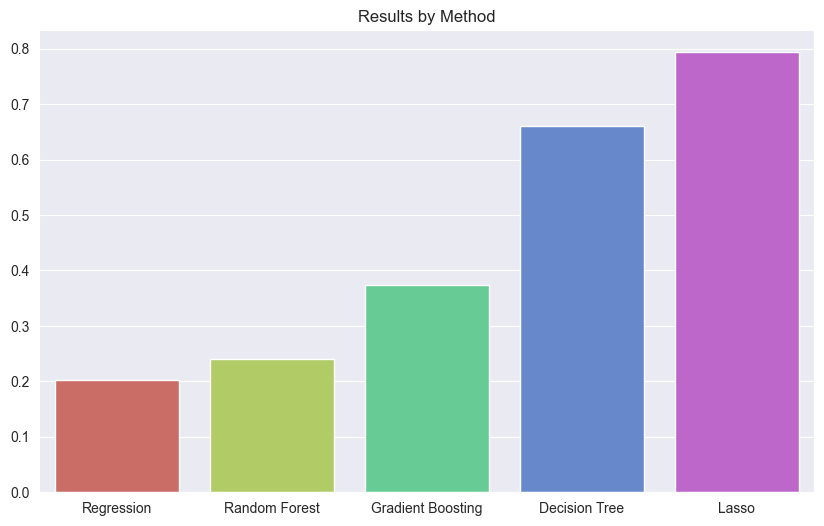

In [37]:
methods = np.array(methods)
results = np.array(resultsMSE)

sort_indices = np.argsort(results)
sorted_methods = methods[sort_indices]
sorted_results = results[sort_indices]

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_methods, y=sorted_results, palette='hls')
plt.title('Results by Method')
plt.show()

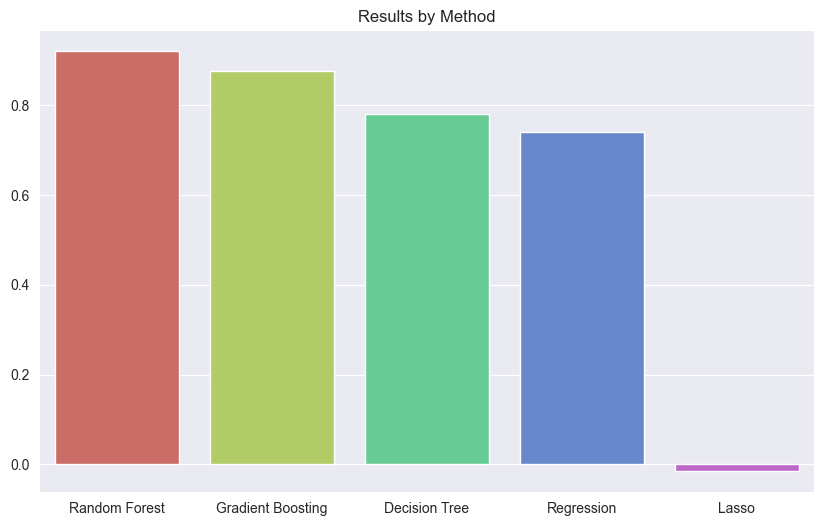

In [38]:
methods = np.array(methods)
results = np.array(resultsR2)

sort_indices = np.argsort(results)[::-1]
sorted_methods = methods[sort_indices]
sorted_results = results[sort_indices]

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_methods, y=sorted_results, palette='hls')
plt.title('Results by Method')
plt.show()

<h1>Tuning</h1>

In [59]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

search_space = {"n_estimators": [100, 200, 500],
                "max_depth": [40, 45, 50, 55, 60, 65, 70, 75],
                "min_samples_split": Real(0.1, 1),
                "min_samples_leaf": Integer(1, 15),
                "max_features": Categorical(['sqrt', 'log2']),
                "bootstrap": Categorical([True, False])}

opt = BayesSearchCV(RandomForestRegressor(),
                    search_spaces=search_space,
                    n_iter=50,
                    n_jobs=-1,
                    n_points=10,
                    verbose=1)

opt.fit(x_train, y_train)

best_params = opt.best_params_

print("Best parameters: ", best_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters:  OrderedDict({'bootstrap': False, 'max_depth': 65, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 0.1, 'n_estimators': 200})


In [74]:
rf = RandomForestRegressor(n_estimators= 200, max_features= 'sqrt', max_depth= 65, n_jobs=(-1))

rf.fit(x_train, y_train)

preds = rf.predict(x_val)

mse = mean_squared_error(y_val, preds)
r2 = r2_score(y_val, preds)

print('The mean squared error is:', mse)
print('The R squared is:', r2)

The mean squared error is: 0.23300838467710672
The R squared is: 0.9493258060644701


Text(0, 0.5, 'Features')

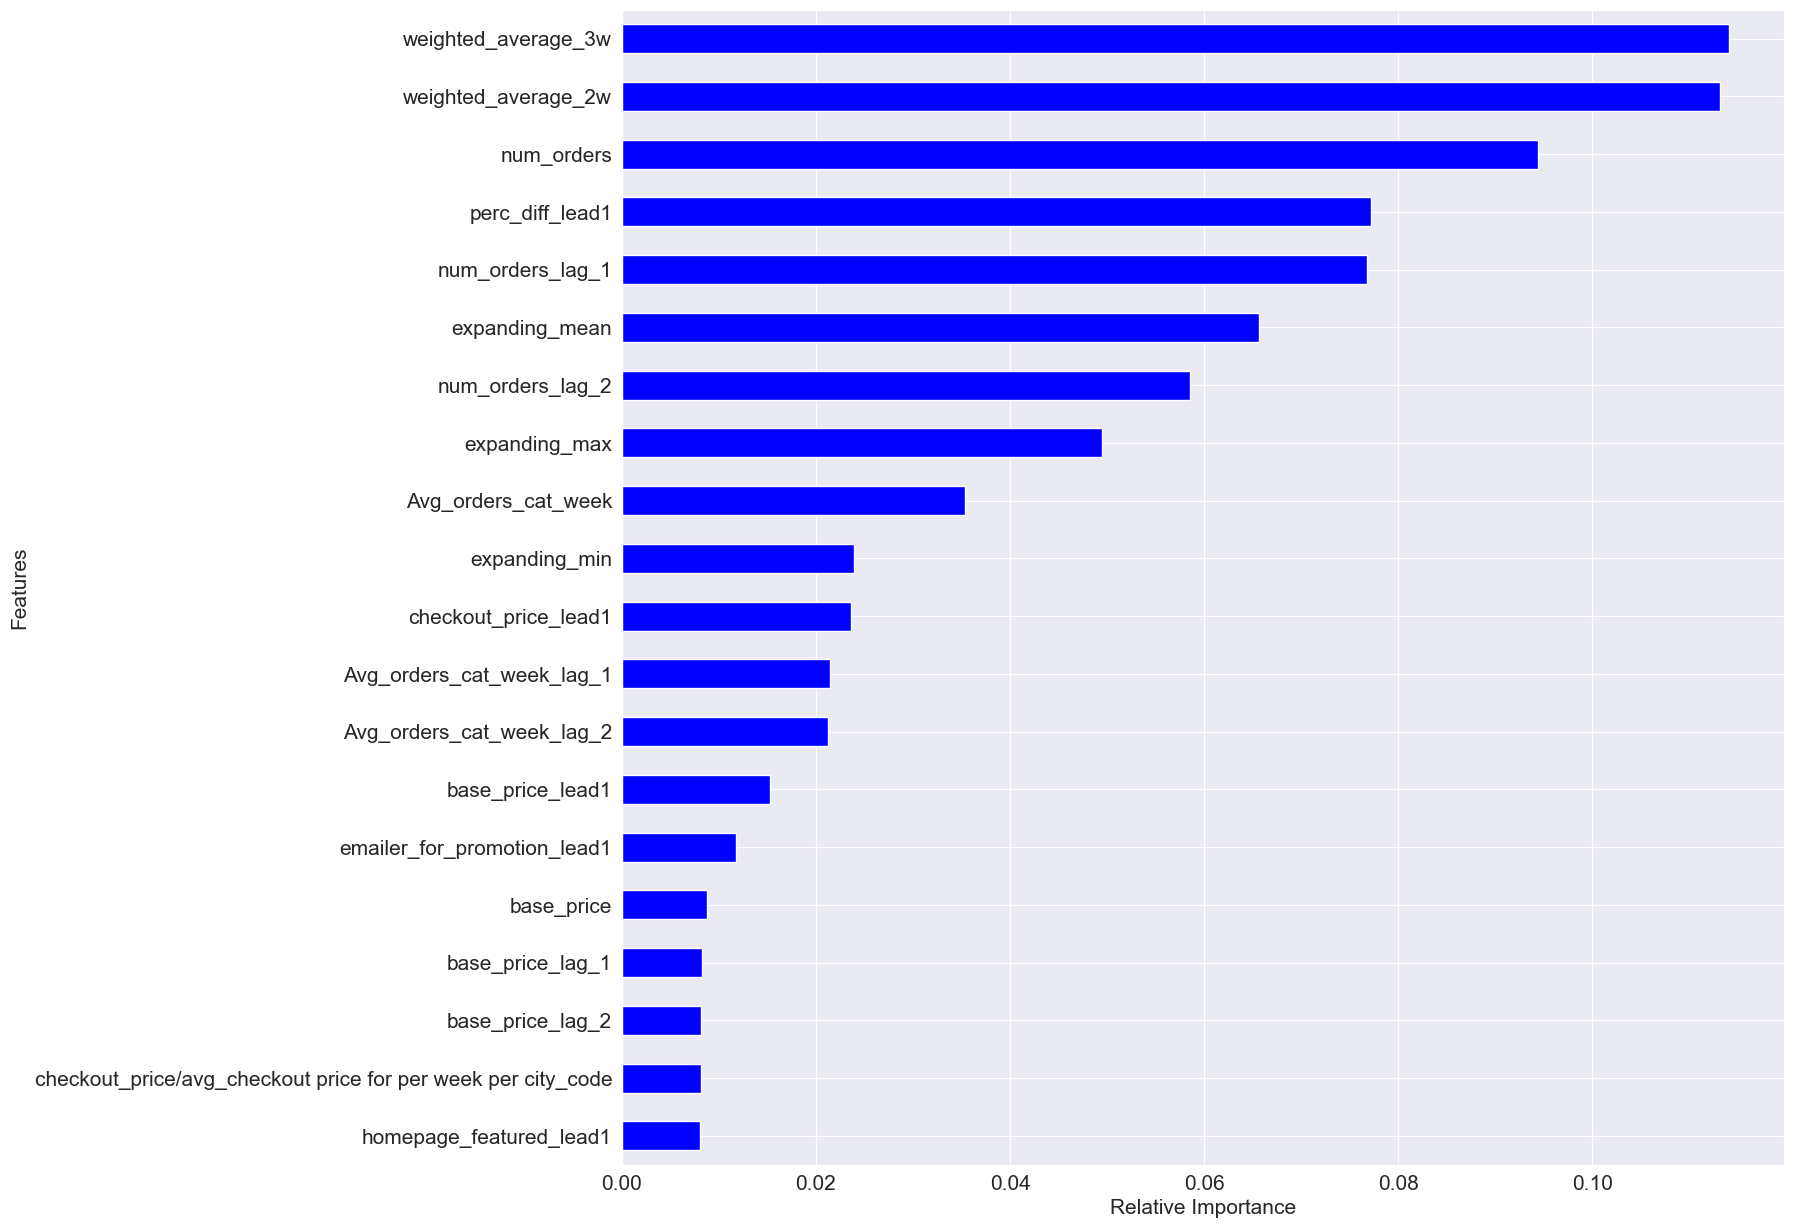

In [70]:
feat_importances = pd.Series(rf.feature_importances_, index=x_train_val.columns)
ax = feat_importances.sort_values(ascending= True)[-20:].plot(kind='barh', color = 'blue', figsize = (15,15), fontsize = 15)
ax.set_xlabel("Relative Importance", fontsize = 15)
ax.set_ylabel("Features", fontsize = 15)

<h1> Predictions </h1>

In [72]:
last_week_data['prediction'] = rf.predict(x_test)
last_week_data['prediction'] = np.expm1(last_week_data['prediction'])
last_week_data.to_csv('data/predictions.csv')